In [2]:
#                                                                   Zomato Data Analysis Project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
dataframe = pd.read_csv("/content/Zomato data .csv")
print(dataframe)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [9]:
# covert the data type of the column rate
def handleRate(value) :
  value = str(value).split('/')
  value = value[0]
  return float(value)

dataframe['rate'] = dataframe['rate'].apply(handleRate)
print(dataframe)
#basically to check whether any value is null or not null
dataframe.info()


                      name online_order book_table  rate  votes  \
0                    Jalsa          Yes        Yes   4.1    775   
1           Spice Elephant          Yes         No   4.1    787   
2          San Churro Cafe          Yes         No   3.8    918   
3    Addhuri Udupi Bhojana           No         No   3.7     88   
4            Grand Village           No         No   3.8    166   
..                     ...          ...        ...   ...    ...   
143       Melting Melodies           No         No   3.3      0   
144        New Indraprasta           No         No   3.3      0   
145           Anna Kuteera          Yes         No   4.0    771   
146                 Darbar           No         No   3.0     98   
147          Vijayalakshmi          Yes         No   3.9     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            800          

In [10]:
dataframe.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'type of restaurant')

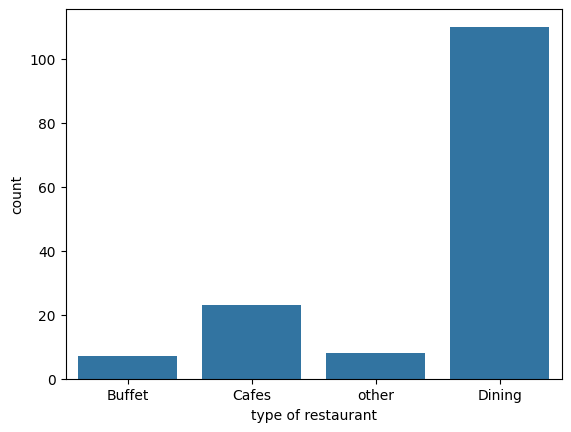

In [11]:
sns.countplot(x = dataframe['listed_in(type)'])
plt.xlabel("type of restaurant")
#conclusion of the graph is that most of the restaurants fall in the category of dining

Text(0, 0.5, 'Voting')

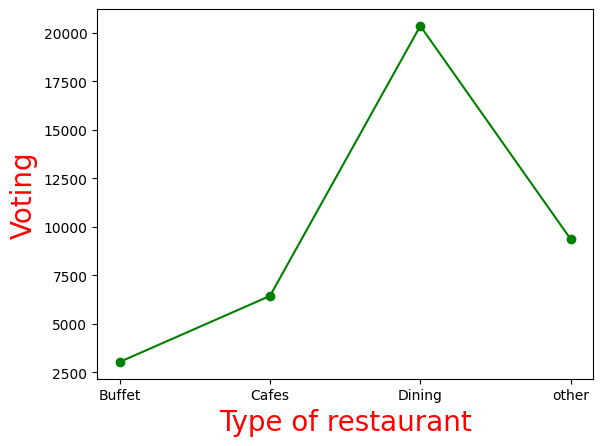

In [14]:
dataframe.head()
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result,c='green',marker='o')
plt.xlabel("Type of restaurant",c='red',size = 20)
plt.ylabel("Voting",c = 'red',size = 20)

#dining restaurants have the most number of rating as compared to the other type of the restaurants

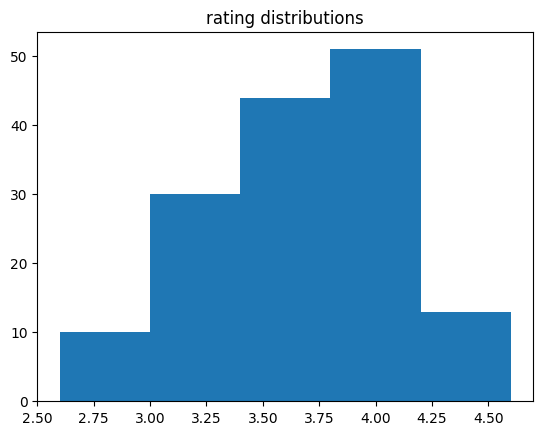

In [16]:
dataframe.head()
plt.hist(dataframe['rate'],bins = 5)
plt.title("rating distributions")
plt.show()
#majority of the restaurants get the rating from 3.5 to 4

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

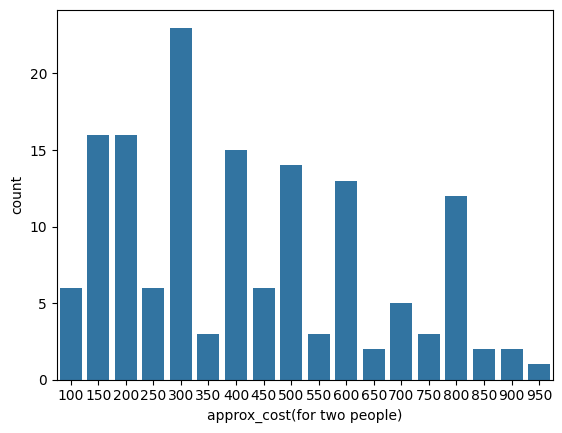

In [18]:
dataframe.head()
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x = couple_data)
#majority of the couples prefer the order of 300 in the restaurants

<Axes: xlabel='online_order', ylabel='rate'>

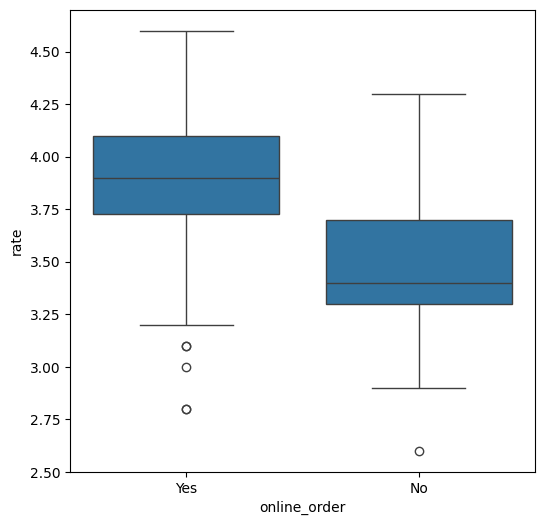

In [22]:
dataframe.head()
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)
#people give higher rating in the online orders as compared to the offline orders

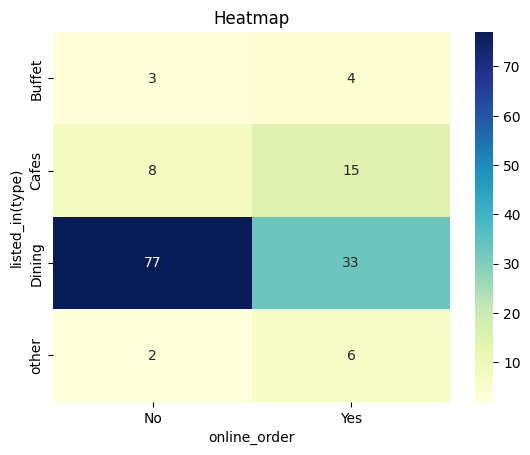

In [29]:
dataframe.head()
pivot_table = dataframe.pivot_table(index = 'listed_in(type)', columns = 'online_order', aggfunc = 'size',fill_value =0)
sns.heatmap(pivot_table, annot = True, cmap = "YlGnBu", fmt = 'd')
plt.title("Heatmap")
plt.xlabel("online_order")
plt.ylabel("listed_in(type)")
plt.show()
#dining restaurants mostly gets the offline orders whereas the other cafes get the online orders .
#this suggests that clients like to eat offline in dining restaurants and prefer ordering online from the other cafes